# Dataset exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('..\\assignment-1\\data\\train.csv')

In [259]:
df.columns

Index(['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'property_zipcode', 'property_lat', 'property_lon',
       'property_type', 'property_room_type', 'property_max_guests',
       'property_bathrooms', 'property_bedrooms', 'property_beds',
       'property_bed_type', 'property_amenities', 'property_sqfeet',
       'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_nr_listings', 'host_nr_listings_total',
       'host_verified', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'booking_cancel_policy', 'reviews_num',
       'reviews_first', 're

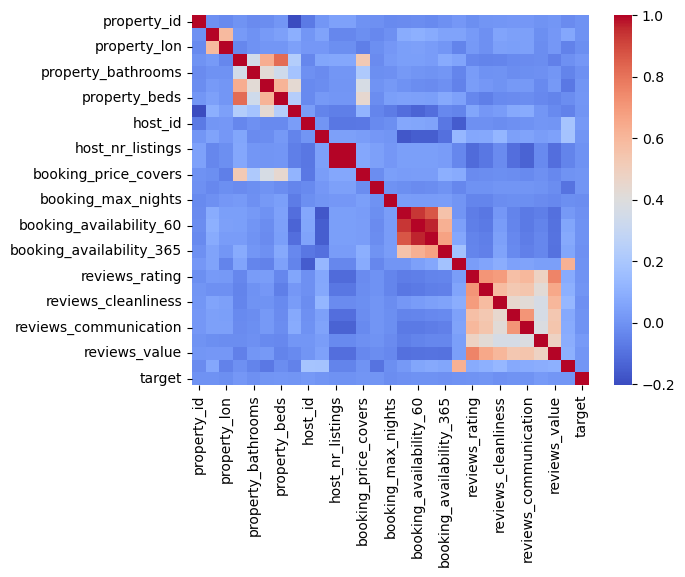

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')

# Show the plot
plt.show()

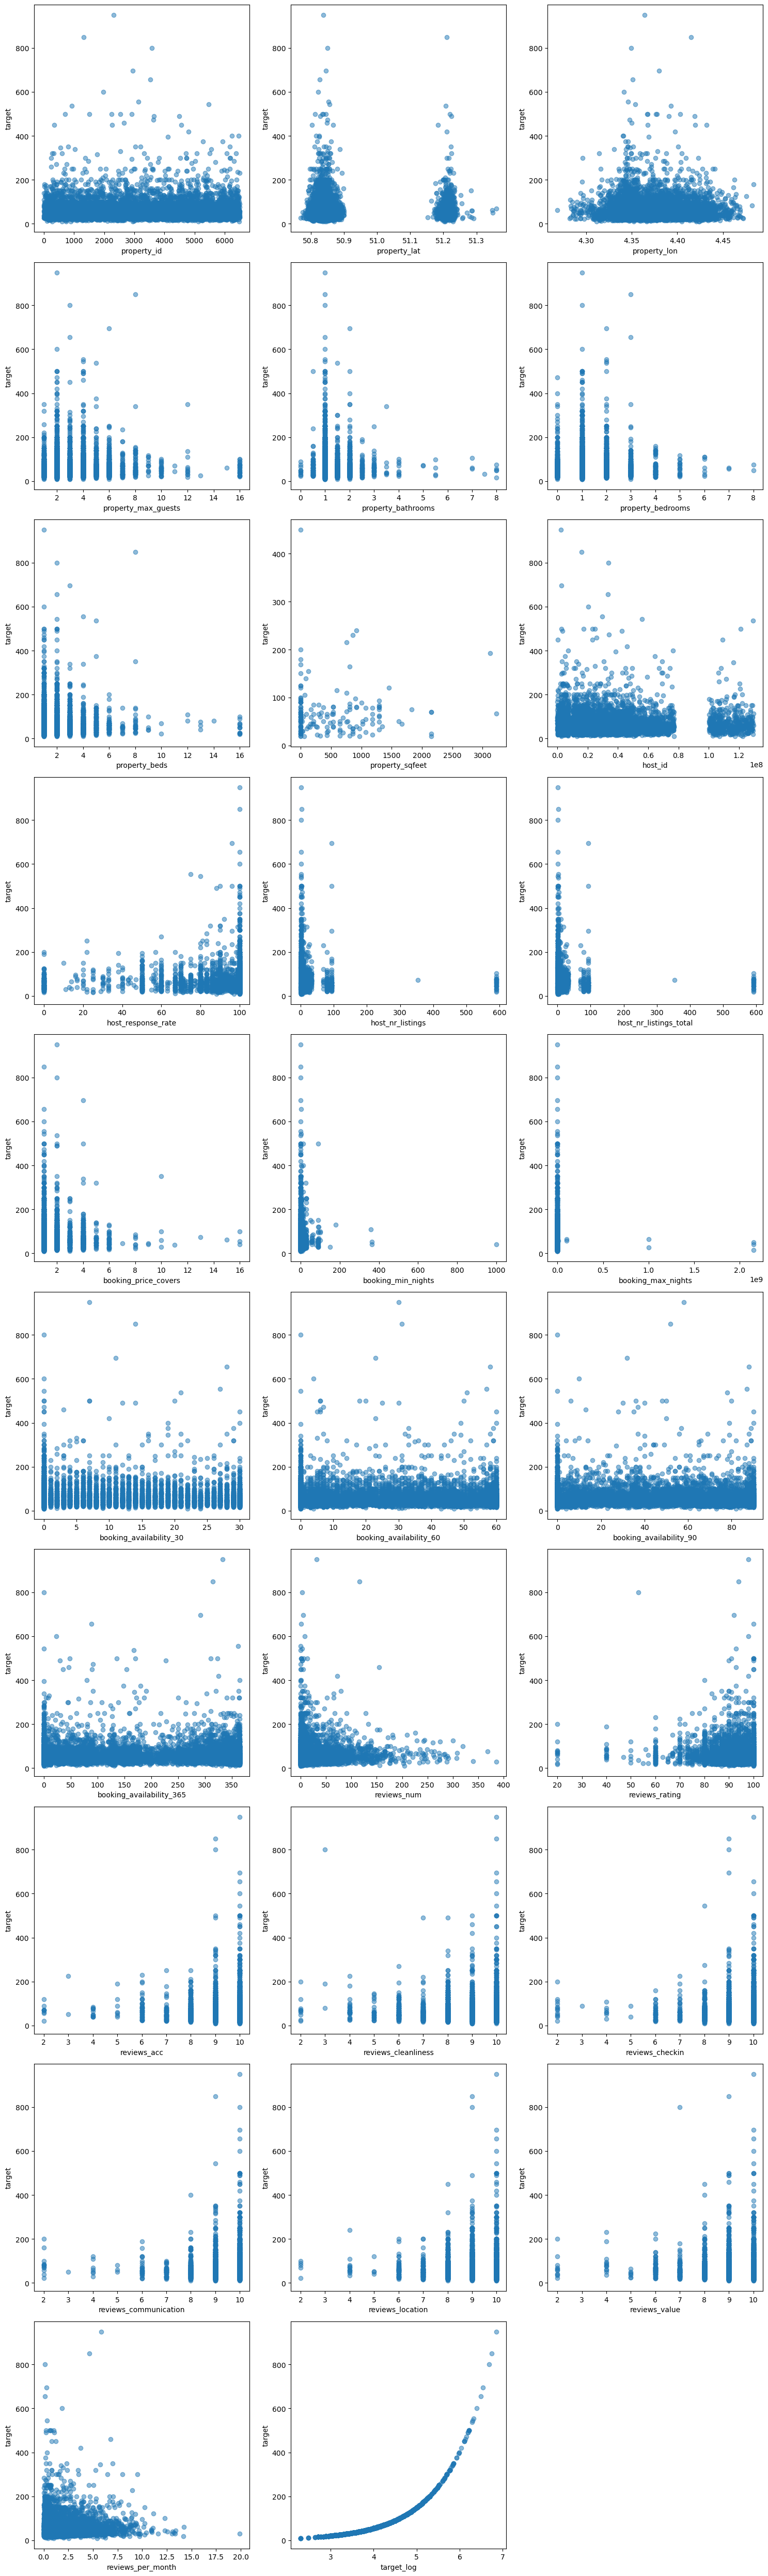

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the columns to use for the scatterplots
columns = [col for col in df.columns if col != 'target' and pd.api.types.is_numeric_dtype(df[col])]

# Define the number of scatterplots per row
n_plots_per_row = 3

# Calculate the number of rows needed to plot all scatterplots
n_rows = (len(columns) + n_plots_per_row - 1) // n_plots_per_row

# Create the scatterplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_plots_per_row, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    # Create a scatterplot for each column
    ax = axes[i]
    ax.scatter(df[col], df['target'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('target')

# Remove any unused axes
for j in range(i+1, n_rows*n_plots_per_row):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()


# Add missing postal codes

Notes:
- generated postcodes (based on longitude/latitude) sometimes have small deviations from 'property_zipcode'
- there are two cases of the zipcode being '11 20'. Spaces have been removed.
- **property_zipcode_imputed** is the new combined column
- Probably better to use longitude/latitude

In [144]:
df['property_zipcode'].isna().sum()

134

In [143]:
import geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="AdvancedAnalytics-application") # create a geolocator object
def get_postal_code(lat, lon):
    location = geolocator.reverse(f"{lat}, {lon}")
    address = location.raw['address']
    if 'postcode' in address:
        return address['postcode']
    else:
        return 0

def impute_zipcode(df):
    # create a copy of the DataFrame
    df_copy = df.copy()
    
    # loop through each row in the DataFrame
    for i, row in df_copy.iterrows():
        # check if the property_zipcode column is a string
        if isinstance(row['property_zipcode'], str):
            # remove spaces in the string and assign it to the property_zipcode_imputed column
            df_copy.at[i, 'property_zipcode_imputed'] = row['property_zipcode'].replace(' ', '')
        # if the property_zipcode column is NaN
        elif pd.isna(row['property_zipcode']):
            # call get_postal_code function and assign the result to the property_zipcode_imputed column
            postal_code = get_postal_code(row['property_lat'], row['property_lon'])
            df_copy.at[i, 'property_zipcode_imputed'] = str(postal_code)
        else:
            # if the property_zipcode column is not a string and not NaN, copy the value to the property_zipcode_imputed column
            df_copy.at[i, 'property_zipcode_imputed'] = str(row['property_zipcode'])
    
    # convert the property_zipcode_imputed column to string
    df_copy['property_zipcode_imputed'] = df_copy['property_zipcode_imputed'].astype(str)
    
    return df_copy

df = impute_zipcode(df)

      property_id                                    property_name  \
0               1                    Chambre à louer,courte durée.   
1               2  Urban Antwerp - Spacious & Authentic Herenhouse   
2               3   comfortable apartment in friendly neighborhood   
3               4                         Historical City Antwerp.   
4               5                              Antwerp center city   
...           ...                                              ...   
6490         6496       Grand appartement Saint Gilles avec balcon   
6491         6497              Chambre cosy dans une grande maison   
6492         6498                      Comfy room in spacious loft   
6493         6499                      Top floor room. Big & sunny   
6494         6500                           house near city centre   

                                       property_summary  \
0     Je loue une chambre dans mon appartement "atyp...   
1     Our place is a typical historic her

In [145]:
df['property_zipcode_imputed'].isna().sum()

0

In [161]:
sum(df['property_zipcode_imputed'] == '0')

4

In [147]:
df['property_zipcode_imputed'].shape

(6495,)

<Axes: xlabel='property_zipcode_imputed', ylabel='Count'>

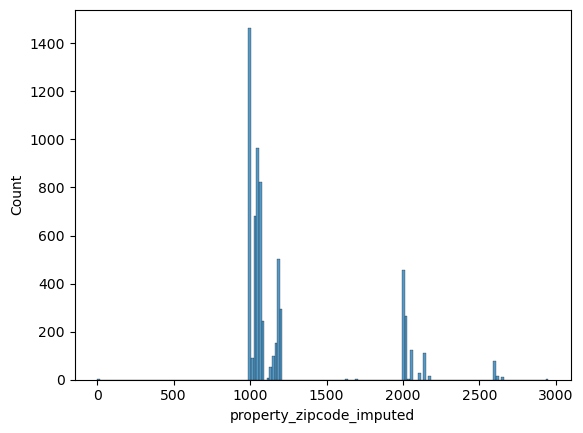

In [159]:
import seaborn
df2 = df.copy()
df2['property_zipcode_imputed'] = df2['property_zipcode_imputed'].astype(int)
seaborn.histplot(data=df2, x='property_zipcode_imputed')

In [164]:
value_counts = df['property_zipcode_imputed'].value_counts().rename_axis('zipcode').reset_index(name='count')
print(value_counts)

   zipcode  count
0     1000   1466
1     1050    966
2     1060    638
3     2000    455
4     1030    364
5     1040    319
6     1190    265
7     2018    254
8     1180    236
9     1070    185
10    1210    157
11    1200    138
12    1080    133
13    2060    115
14    2140    111
15    1150    100
16    1020     89
17    1160     85
18    2600     77
19    1170     66
20    1140     48
21    1090     42
22    1081     37
23    2100     29
24    1083     19
25    2610     16
26    1082     14
27    2660     12
28    2020     12
29    2170     10
30    1120      7
31    2050      7
32    2180      6
33    1130      4
34       0      4
35    2040      3
36    2030      1
37    1700      1
38    2008      1
39    1620      1
40    2950      1
41    1630      1


In [165]:
df['property_zipcode_imputed_prefix'] = df['property_zipcode_imputed'].str[:2].fillna('0')

In [167]:
value_counts = df['property_zipcode_imputed_prefix'].value_counts().rename_axis('zipcode').reset_index(name='count')
print(value_counts)

  zipcode  count
0      10   4272
1      20    848
2      11    811
3      12    295
4      21    156
5      26    105
6       0      4
7      16      2
8      29      1
9      17      1


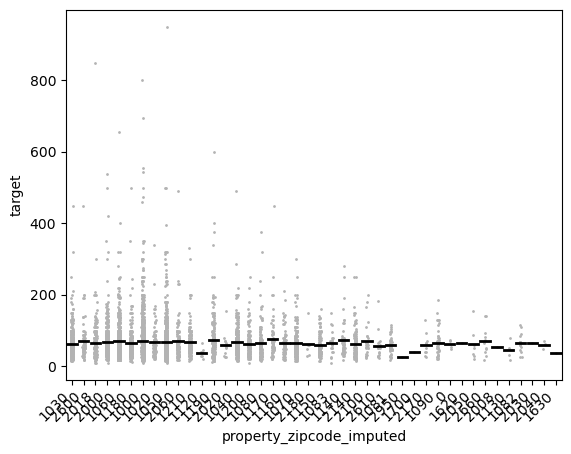

In [186]:
p = sns.stripplot(x="property_zipcode_imputed", y="target", data=df, size=2, color=".7")
plt.xticks(rotation=45, ha="right")

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="property_zipcode_imputed",
            y="target",
            data=df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.show()

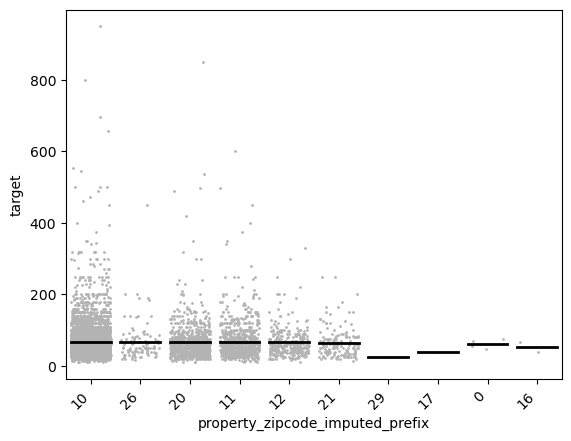

In [185]:
p = sns.stripplot(x="property_zipcode_imputed_prefix", y="target", data=df, size=2, color=".7", jitter=0.4)
plt.xticks(rotation=45, ha="right")

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="property_zipcode_imputed_prefix",
            y="target",
            data=df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.show()

# Exploring location v target

In [7]:
df['target_log'] = np.log(df['target'])

In [4]:
# Training set

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# Create a folium map object
m = folium.Map(location=[df['property_lat'].mean(), df['property_lon'].mean()], zoom_start=10, control_scale=True)

# Define a colormap based on the values in the target column
cmap = cm.get_cmap('seismic')
colormap = {value: colors.rgb2hex(cmap((value - df['target_log'].min()) / (df['target_log'].max() - df['target_log'].min()))) for value in df['target_log'].unique()}

# Add points to the map
for index, row in df.iterrows():
    folium.CircleMarker(location=[row['property_lat'], row['property_lon']],
                        radius=3,
                        color='none',
                        fill_color=colormap[row['target_log']],
                        fill_opacity=1).add_to(m)

# Display the map
m


C:\Users\herre\AppData\Local\Temp\ipykernel_19580\1395886968.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('seismic')


In [5]:
# Test set

df2 = pd.read_csv('..\\assignment-1\\data\\test.csv')
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# Create a folium map object
m = folium.Map(location=[df2['property_lat'].mean(), df2['property_lon'].mean()], zoom_start=10, control_scale=True)


# Add points to the map
for index, row in df2.iterrows():
    folium.CircleMarker(location=[row['property_lat'], row['property_lon']],
                        radius=3,
                        color='none',
                        fill_color='black',
                        fill_opacity=1).add_to(m)

# Display the map
m

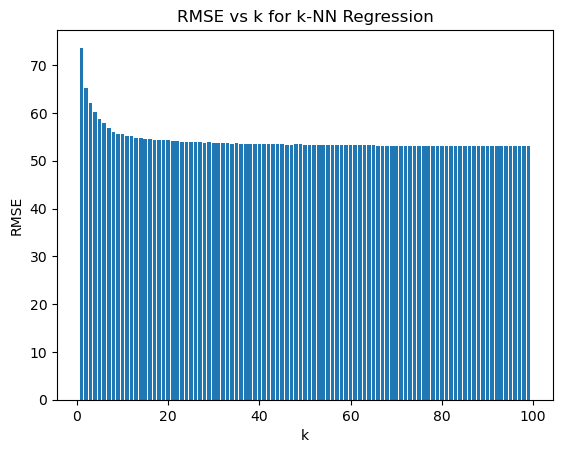

In [289]:
# KNN on location as model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the target variable and the latitude/longitude columns
target_col = 'target'
lat_col = 'property_lat'
lon_col = 'property_lon'

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[[lat_col, lon_col]], df[target_col], test_size=0.5)

# Define the range of k values to test
k_range = range(1, 100)

# Define a function to calculate the RMSE for a given k value
def knn_rmse(k):
    knn = KNeighborsRegressor(n_neighbors=k, metric='haversine')
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    return rmse

# Calculate the RMSE for each k value
rmse_values = [knn_rmse(k) for k in k_range]

# Plot the RMSE values for each k value
fig, ax = plt.subplots()
ax.bar(k_range, rmse_values)
ax.set_xlabel('k')
ax.set_ylabel('RMSE')
ax.set_title('RMSE vs k for k-NN Regression')
plt.show()


# Baseline models

## Mean as prediction

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define a list of random states to try
random_states = np.random.randint(low=0, high=100000, size=100)

# Create an empty list to store the RMSE values for each random state
rmse_list = []

for random_state in random_states:
    # Split the dataset into training and testing sets using the current random state
    X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=random_state)

    # Compute the mean of the training set
    mean_pred = np.mean(y_train)

    # Make predictions using the mean
    mean_pred_test = [mean_pred] * len(y_test)

    # Compute the RMSE for the mean prediction
    mean_rmse = np.sqrt(mean_squared_error(y_test, mean_pred_test))

    # Append the RMSE value to the list
    rmse_list.append(mean_rmse)

# Plot the RMSE values for each random state
fig = px.histogram(rmse_list)
fig.show()


## Baseline XGBoost models

In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
X['property_type']

0         Apartment
1             House
2       Condominium
3             House
4             House
           ...     
6490      Apartment
6491          House
6492      Apartment
6493          House
6494          House
Name: property_type, Length: 6495, dtype: object

In [42]:
df['booking_cancel_policy']

0       flexible
1       flexible
2       flexible
3       flexible
4       flexible
          ...   
6490    flexible
6491    flexible
6492    moderate
6493    flexible
6494    flexible
Name: booking_cancel_policy, Length: 6495, dtype: object

In [67]:
X, y = df.drop('target', axis=1), df[['target']]

X['booking_cancel_policy']

0       flexible
1       flexible
2       flexible
3       flexible
4       flexible
          ...   
6490    flexible
6491    flexible
6492    moderate
6493    flexible
6494    flexible
Name: booking_cancel_policy, Length: 6495, dtype: object

In [85]:
from sklearn.preprocessing import OneHotEncoder

X, y = df.drop('target', axis=1), df[['target']]

print('Number of categories in property_type:', X['property_type'].nunique())
print('Number of categories in property_room_type:', X['property_room_type'].nunique())
print('Number of categories in booking_cancel_policy:', X['booking_cancel_policy'].nunique())

# Select the categorical columns that you want to transform
cat_cols = ['property_type', 'property_room_type', 'booking_cancel_policy']

# Create an instance of the OneHotEncoder class
ohe = OneHotEncoder()

# Fit the encoder on the categorical columns of the DataFrame X
ohe.fit(X[cat_cols])

# Transform the categorical columns into dummy variables
cat_encoded = ohe.transform(X[cat_cols]).toarray()

# Create a DataFrame with the transformed variables
cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_cols))

# Concatenate the transformed variables with the original DataFrame X
X_encoded = pd.concat([X.drop(cat_cols, axis=1), cat_encoded_df], axis=1)

Number of categories in property_type: 23
Number of categories in property_room_type: 3
Number of categories in booking_cancel_policy: 4


In [114]:
# Select the columns that start with 'property_type', 'property_room_type', and 'booking_cancel_policy', but exclude the columns named 'property_type', 'property_room_type', and 'booking_cancel_policy'
columns = X_encoded.filter(regex='^(property_type|property_room_type|booking_cancel_policy)(?!$)')

# Add the remaining columns to the selection
columns = pd.concat([columns, X_encoded[['property_lon','property_lat','property_bedrooms','property_max_guests','property_beds','reviews_rating']]], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(columns, y, random_state=0)

print(X_train.columns)

Index(['property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Castle', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Serviced apartment', 'property_type_Tent',
       'property_type_Timeshare', 'property_type_Townhouse',
       'property_type_Villa', 'property_type_Yurt',
       'property_room_type_Entire home/apt', 'property_room_type_Private room',
       'property_room_type_Shared room', 'booking_cancel_policy_flexible',
       'booking_cancel_policy_moderate', 'booking_cancel_policy_strict',
       'booking_cancel_policy_super_strict_30', 'property_lon', 'property_lat',
       'property_

In [115]:
xgb_reg = xgb.XGBRegressor()

In [116]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [117]:
preds = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 52.190520


# Autotuned XGBoost 

In [111]:
from xgbtune import tune_xgb_model
params = {'eval_metric': 'rmse'}
params, round_count = tune_xgb_model(params, X_train, y_train)

tuning pass 0...
computing best round...
best round: 9
tuning max_depth and min_child_weight ...
best loss: 47.1129
best max_depth: 8
best min_child_weight: 1
tuning gamma ...
best loss: 47.1129
best gamma: 0.0
re-computing best round...
best round: 9
tuning subsample and colsample_bytree ...
best loss: 46.6759
best subsample: 0.7
best colsample_bytree: 1.0
fine tuning subsample and colsample_bytree ...
best loss: 46.6759
best subsample: 0.7
best colsample_bytree: 1.0
tuning alpha and lambda ...
best loss: 46.6759
best alpha: 0
best lambda: 1
tuning seed ...
best loss: 46.4341
best seed: 42
{'eval_metric': 'rmse', 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.7, 'colsample_bytree': 1.0, 'alpha': 0, 'lambda': 1, 'seed': 42}
tuning pass 1...
computing best round...
best round: 7
tuning max_depth and min_child_weight ...
best loss: 47.7416
best max_depth: 8
best min_child_weight: 1
tuning gamma ...
best loss: 47.7416
best gamma: 0.0
re-computing best round...
best ro

In [112]:
regressor=xgb.XGBRegressor(**params)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 54.833492
